# Проект по исследованию рынка компьютерных игр для интернет-магазина "Стримчик".

## Введение

В предстоящем проекте нам нужно определить факторы, которые позволят нам сделать прогноз о состоянии рынка игр в следуюшем году. Наш заказчик - магазин "Стримик", который продает игры по всему миру. Он предоставил нам данные о продажах игр за последние 35 лет. 
В данных указано название игры, платформа,  на которой она вышла, год выпуска, жанр, рейтинг критиков и пользователей, возрастной рейтинг и данные о продажах по миру, разделенные на регионы. 
Наше исследование будет включать следующие шаги:

1) Мы найдем самые популярные игровые платформы. 

2) Сделаем по ним прогноз на будущее. 

3) Создадим портреты средних пользователей в разных регионах. 

4) Посмотрим, насколько сильно влияют оценки критиков и пользователей на продажи игр.

5) Проверим две гипотезы: игры, выпущенные на платформах XOne и PC, имеют одинаковый пользовательский рейтинг и жанры игр Sports и Action имеют разный пользовательский рейтинг.

## Знакомство с данными

### Импорт необходимых для работы библиотек

In [211]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np
import math as m
import datetime 
import warnings
warnings.filterwarnings('ignore')

Мы импортировали все необходимые для работы библиотеки.

### Импорт датасетов

In [212]:
try:
    data = pd.read_csv('C:/Praktikum/game_prognosis_project/games.csv')
except:
    data = pd.read_csv('/datasets/games.csv')

In [213]:
def data_first_look(data):
    print('Посмотрим на основную информацию:')
    print()
    data.info()
    print()
    print('Посмотрим на первые 10 строк таблицы:')
    display(data.head())
    print()
    print('Количество дубликатов в данных равно', data.duplicated().sum())
    
data_first_look(data) 

Посмотрим на основную информацию:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB

Посмотрим на первые 10 строк таблицы:


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN



Количество дубликатов в данных равно 0


<b>Прочитали таблицу с данными и посмотрели, с какими колонками с каким типом данных мы будем работать, посчитали дубликаты (их нет). Можно приступать к предобработке данных.</b>

### Предобработка данных

In [214]:
data.columns = data.columns.str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Привели названия колонок к нижнему регистру и проверили результат.

In [215]:
data['sum_of_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales'] # сложили продажи по всем странам
data['sale_percentage'] = data['sum_of_sales'] / data['sum_of_sales'].sum() * 100 # посчитали процент продаж конкретной игры
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
 11  sum_of_sales     16715 non-null  float64
 12  sale_percentage  16715 non-null  float64
dtypes: float64(8), object(5)
memory usage: 1.7+ MB


Добавили колонку с суммарными продажами по всем странам и процентным соотношением продаж игры к общей сумме продаж.

In [216]:
display(data['user_score'].unique(), data['critic_score'].unique(), data['genre'].unique(), data['platform'].unique())

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

Посмотрели на уникальные значения в колонках, где это может иметь значение. В колонке с оценками пользователей есть непонятная оценка tbd. Гугл подсказал нам, что эта оценка расшифровывается как to be done - то есть пользовательский рейтинг игры еще не определен. В следующем разделе мы рассмотрим игры с этой оценкой подробнее.

<b>На этом предобработку данных можно считать оконченной.<b/>

### Жанр оценки TBD и его обработка

Мы знаем, что в колонке с оценками игр, есть жанр TBD. В этом разделе мы проанализируем, где он встречается и с какой закономерностью.

In [217]:
data_tbd = data[data['user_score']=='tbd'] # фильтруем дату по оценке tbd

In [218]:
tbd_group = data_tbd.groupby('genre')['sum_of_sales'].agg(['sum']) # группируем данные по сумме продаж
tbd_group['frac'] = tbd_group['sum'] / tbd_group['sum'].sum() * 100 # считаем процент от общей суммы
tbd_group.sort_values(by='frac', ascending=False) # сортируем по убыванию

,sum,frac
genre,,
Misc,99.82,21.885551
Sports,83.10,18.219689
Action,69.61,15.262004
Simulation,56.59,12.407367
Racing,35.15,7.706643
Adventure,32.43,7.110283
Puzzle,32.24,7.068625
Platform,27.76,6.086385
Shooter,7.63,1.672879


Мы посчитали, какой процент от продаж составляют игры с оценкой tbd по жанрам. Больше всего ее процент в аркадах, спорте и экшенах, но это пока не позволяет нам сделать выводы.

In [219]:
data_not_tbd = data[data['user_score']!='tbd'] # фильтруем дату по оценке не-tbd

In [220]:
not_tbd_group = data_not_tbd.groupby('genre')['sum_of_sales'].agg(['sum']) # группируем данные по сумме продаж
not_tbd_group['frac'] = not_tbd_group['sum'] / not_tbd_group['sum'].sum() * 100 # считаем процент от общей суммы
not_tbd_group.sort_values(by='frac', ascending=False) # сортируем по убыванию

,sum,frac
genre,,
Action,1674.56,19.800430
Sports,1248.17,14.758685
Shooter,1044.82,12.354222
Role-Playing,931.11,11.009685
Platform,800.01,9.459525
Misc,702.69,8.308788
Racing,693.52,8.200360
Fighting,441.79,5.223839
Simulation,333.38,3.941971


Мы сравнили распределение продаж по жанрам в таблице только с оценкой tbd и со всеми оценками - ничего показательного не обнаружили, распределение не совпадает.

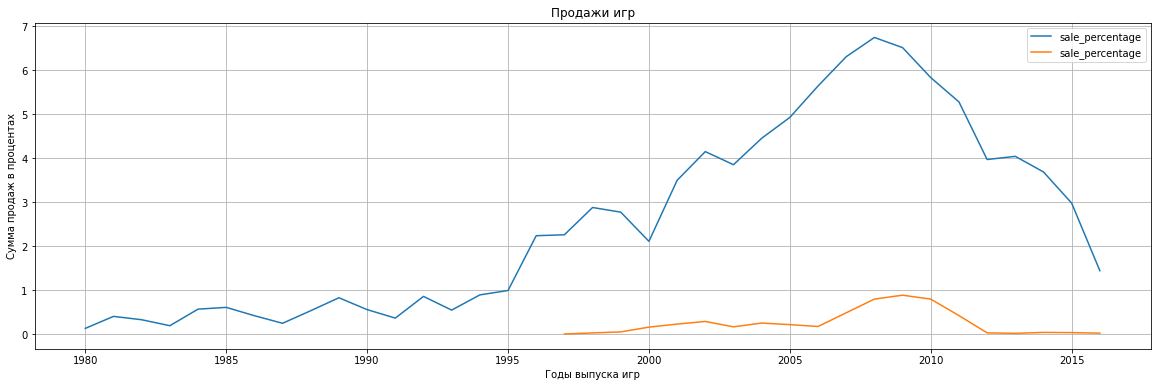

In [221]:
ax = data_not_tbd.pivot_table(index='year_of_release', values='sale_percentage', aggfunc='sum') \
        .plot(grid=True, figsize=(20, 6), label='не TBD')
data_tbd.pivot_table(index='year_of_release', values='sale_percentage', aggfunc='sum') \
        .plot(grid=True, figsize=(20, 6), label='TBD', ax=ax)
plt.title('Продажи игр')
plt.xlabel('Годы выпуска игр')
plt.ylabel('Сумма продаж в процентах')
plt.show()

Тогда мы посмотрели на процентное соотношение продаж игр с рейтингом tbd от общего числа продаж. Видно, что начиная с 2012 года количество продаж игра с оценкой tbd сократилось до незначительного(менее 2% от общего числа продаж). Вероятно, это связано с широким распространением сайтов, на которых пользователи могут оценить игру. Соответственно, для прогноза продаж на следующий год нам не нужны оценки tbd, их все равно будет незначительное количество. Так что мы можем привести формат столбца с оценками пользователей к числовому, чтобы с ним было проще работать.

### Приведение данных к нужному формату

In [222]:
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce') # привели столбец с оценками к числовому формату
data['year_of_release'] = pd.to_datetime(data['year_of_release'], format='%Y') # перевели колонку с годом выпуска к формату даты
data.info()
data.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             16713 non-null  object        
 1   platform         16715 non-null  object        
 2   year_of_release  16446 non-null  datetime64[ns]
 3   genre            16713 non-null  object        
 4   na_sales         16715 non-null  float64       
 5   eu_sales         16715 non-null  float64       
 6   jp_sales         16715 non-null  float64       
 7   other_sales      16715 non-null  float64       
 8   critic_score     8137 non-null   float64       
 9   user_score       7590 non-null   float64       
 10  rating           9949 non-null   object        
 11  sum_of_sales     16715 non-null  float64       
 12  sale_percentage  16715 non-null  float64       
dtypes: datetime64[ns](1), float64(8), object(4)
memory usage: 1.7+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_of_sales,sale_percentage
0,Wii Sports,Wii,2006-01-01,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54,0.925782
1,Super Mario Bros.,NES,1985-01-01,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24,0.451338
2,Mario Kart Wii,Wii,2008-01-01,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52,0.398398
3,Wii Sports Resort,Wii,2009-01-01,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77,0.367553
4,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38,0.351963


Привели формат данных в колонке с рейтингом пользователей к числовому формату, а в колонке с годом выпуска к формату даты.

In [223]:
data['critic_score'].fillna(0)
data['user_score'].fillna(0)

0        8.0
1        0.0
2        8.3
3        8.0
4        0.0
        ... 
16710    0.0
16711    0.0
16712    0.0
16713    0.0
16714    0.0
Name: user_score, Length: 16715, dtype: float64

Заменили пропуски в колонках с оценками пользователей и критиков на ноль, чтобы нам было удобнее работать с данными - считать среднее и суммы.
В колонках с рейтингами критиков и пользователей есть пропущенные значения, но они не влияют на общую картину: оценок все равно достаточно, рейтинг мы все еще посчитать можем.

In [224]:
data.duplicated().sum()

0

Убедились, что в таблице нет дубликатов.

<b>Работа с приведением данных в нужный формат закончена. </b>

## Анализ данных 

#### Связь оценок пользователей и критиков

,year_of_release,critic_score,user_score,name
36,2016-01-01,73.155172,6.629771,502
35,2015-01-01,72.871111,6.665993,606
34,2014-01-01,71.065134,6.580243,581
33,2013-01-01,71.278388,6.470724,544
32,2012-01-01,72.984424,6.817404,653
31,2011-01-01,68.692000,6.623553,1136
30,2010-01-01,67.482000,6.875375,1255
29,2009-01-01,67.554531,6.990717,1426
28,2008-01-01,65.904895,6.950983,1427
27,2007-01-01,66.180636,6.895707,1197


Text(0, 0.5, 'Средние оценки пользователей и критиков')

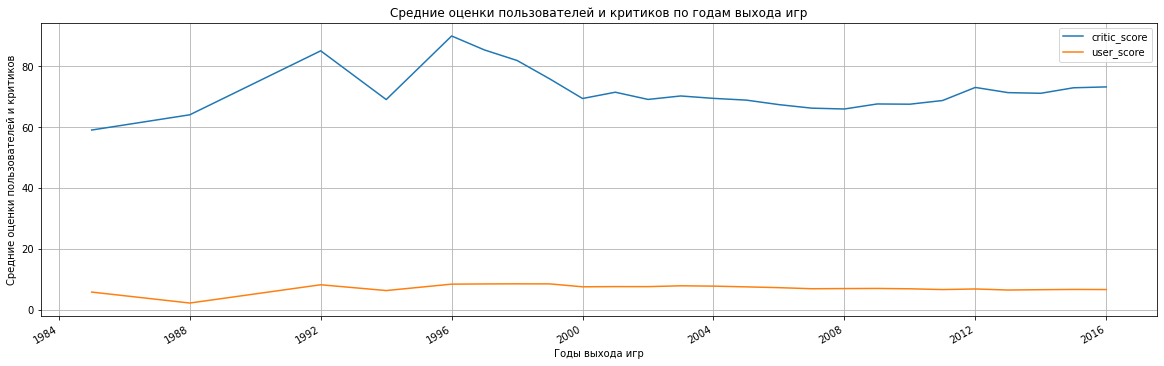

In [225]:
display(data.groupby(['year_of_release']).agg({'critic_score':'mean', 'user_score':'mean', 'name':'count'}).reset_index().sort_values(by='year_of_release', ascending=False))
# посчитали средние оценки пользователей и критиков по годам
data.pivot_table(index='year_of_release', values=['user_score','critic_score'], aggfunc='mean').plot(grid=True, figsize=(20, 6))
# построили график для наглядности
plt.title('Средние оценки пользователей и критиков по годам выхода игр')
plt.xlabel('Годы выхода игр')
plt.ylabel('Средние оценки пользователей и критиков')

<b>Мы сгруппировали данные по году, подсчитав количество выпущенных игр, среднюю оценку пользователей и критиков в каждом представленном году. Видно, что количество игр начало расти с 2002 года, при этом оценки пользователей и критиков, скорее, падали. Мы можем предположить, что с ростом количества игр, выходит и больше посредственных игр, соответственно и общий рейтинг за год снижается.</b>

#### Определяем популярные игровые платформы 

In [226]:
best_selled_platform = data.pivot_table(index=['platform'], values=['sum_of_sales', 'sale_percentage'], aggfunc='sum')
best_selled_platform.sort_values(by='sum_of_sales', ascending=False) # строим сводную таблицу по продажам игр по платформам

,sale_percentage,sum_of_sales
platform,,
PS2,14.084913,1255.77
X360,10.895599,971.42
PS3,10.539262,939.65
Wii,10.178774,907.51
DS,9.041568,806.12
PS,8.197440,730.86
GBA,3.565055,317.85
PS4,3.523443,314.14
PSP,3.298111,294.05


Мы соотнесли платформы, на которых выпускали игр с суммой продаж и процентным соотношением продаж игр для этих платформ. Есть шесть платформ с выдающимися продажами: PS2 (14% от всех проданных игр), X360 (почти 11%), PS3 (10,5%),Wii (10,1%), DS(9%) и PS (8%).

Text(0, 0.5, 'Сумма продаж в миллионах долларов')

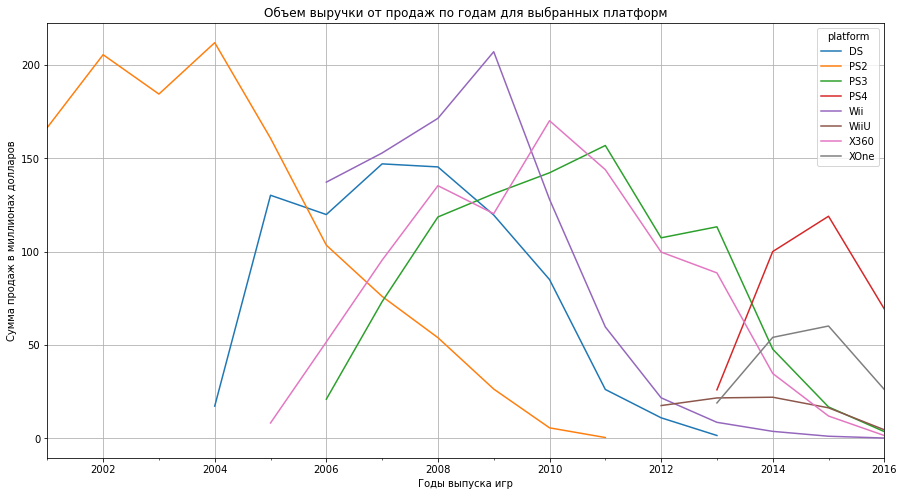

In [227]:
data_saled_platform = data.query('platform == ("DS", "PS2", "PS3", "Wii", "X360", "PS4", "XOne","WiiU") and year_of_release > 2000')
data_saled_platform.pivot_table(index=['year_of_release'], columns='platform', values='sum_of_sales', aggfunc='sum').plot(grid=True, figsize=(15, 8))
plt.title('Объем выручки от продаж по годам для выбранных платформ')
plt.xlabel('Годы выпуска игр')
plt.ylabel('Сумма продаж в миллионах долларов')

<b>Также мы сделали таблицу с суммой продаж по годам для платформ, которые принесли больше всего прибыли и платформами, которые появились в последние несколько лет, чтобы увидеть тренды грядущего года. Можно сделать вывод, что в среднем платформы популярны 5-6 лет, потом сумма продаж по ним идет на спад, а потом платформа меняется. Конечно, есть и рекордные платформы: например, PS2 была популярна аж 9 лет. В последние несколько лет на рынок вышла PS4, можно ожидать спрос на игры на этой платформе в ближайшие несколько лет, как и на игры на платформе XOne.</b>

### Прогноз на основании популярности платформ

#### Определяем необходимые для составления прогноза данные

In [228]:
data_saled_platform = data.query('platform == ("DS", "PS2", "PS3", "Wii", "PS4", "XOne")')

Мы сделали сделали срез по платформам, которые нас интересуют: DS, PS2, PS3 и Wii (как платформы, которые принесли больше всего прибыли в прошлом) и PS4 и XOne (как потенциально прибыльные платформы в будущем).

In [229]:
data_cleaned = data_saled_platform.query('year_of_release >= 2012 and platform == ("DS", "PS2", "PS3", "Wii", "X360", "PS4", "XOne", "WiiU")')
data_cleaned.info() # сделали срез по данным, необходимым для прогноза, проверили данные

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1217 entries, 16 to 16710
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             1217 non-null   object        
 1   platform         1217 non-null   object        
 2   year_of_release  1217 non-null   datetime64[ns]
 3   genre            1217 non-null   object        
 4   na_sales         1217 non-null   float64       
 5   eu_sales         1217 non-null   float64       
 6   jp_sales         1217 non-null   float64       
 7   other_sales      1217 non-null   float64       
 8   critic_score     641 non-null    float64       
 9   user_score       742 non-null    float64       
 10  rating           790 non-null    object        
 11  sum_of_sales     1217 non-null   float64       
 12  sale_percentage  1217 non-null   float64       
dtypes: datetime64[ns](1), float64(8), object(4)
memory usage: 133.1+ KB


In [230]:
data_cleaned.head(10) # проверили данные еще раз

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_of_sales,sale_percentage
16,Grand Theft Auto V,PS3,2013-01-01,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05,0.236100
31,Call of Duty: Black Ops 3,PS4,2015-01-01,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63,0.164092
34,Call of Duty: Black Ops II,PS3,2012-01-01,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79,0.154671
42,Grand Theft Auto V,PS4,2014-01-01,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62,0.141548
69,Call of Duty: Ghosts,PS3,2013-01-01,Shooter,4.10,3.63,0.38,1.25,71.0,2.6,M,9.36,0.104983
77,FIFA 16,PS4,2015-01-01,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58,0.096235
81,FIFA Soccer 13,PS3,2012-01-01,Action,1.06,5.01,0.13,1.97,88.0,6.6,E,8.17,0.091636
83,Pokemon Black 2/Pokemon White 2,DS,2012-01-01,Role-Playing,2.79,1.72,3.14,0.41,NaN,NaN,NaN,8.06,0.090402
87,Star Wars Battlefront (2015),PS4,2015-01-01,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98,0.089505
92,Call of Duty: Advanced Warfare,PS4,2014-01-01,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66,0.085916


Мы отфильтровали данные до тех, которые нас интересуют: оставили самые популярные платформы, а также убрали данные до 2012 года, чтобы получить репрезентативные оценки пользователей.

Для прицельного анализа мы выбрали 2015 год: в этом году вышло много (606) игр, а также на рынке присутствовало шесть игровых платформ, что достаточно, чтобы сделать анализ.

In [231]:
data_year_prognosis = data.query('year_of_release == 2015') # сделали срез по нужному году
data_year_prognosis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 606 entries, 31 to 16662
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             606 non-null    object        
 1   platform         606 non-null    object        
 2   year_of_release  606 non-null    datetime64[ns]
 3   genre            606 non-null    object        
 4   na_sales         606 non-null    float64       
 5   eu_sales         606 non-null    float64       
 6   jp_sales         606 non-null    float64       
 7   other_sales      606 non-null    float64       
 8   critic_score     225 non-null    float64       
 9   user_score       297 non-null    float64       
 10  rating           315 non-null    object        
 11  sum_of_sales     606 non-null    float64       
 12  sale_percentage  606 non-null    float64       
dtypes: datetime64[ns](1), float64(8), object(4)
memory usage: 66.3+ KB


<b>Мы выбрали для составления прогноза популярности игр на определенных платформах 2015 год - это год, когда на рынке было шесть игровых платформ и вышло достаточно много игр. Этого достаточно, чтобы выявить основные закономерности. </b>

#### Анализ распределения продаж по платформам

count    1217.000000
mean        0.665711
std         1.427093
min         0.010000
25%         0.050000
50%         0.200000
75%         0.660000
max        21.050000
Name: sum_of_sales, dtype: float64

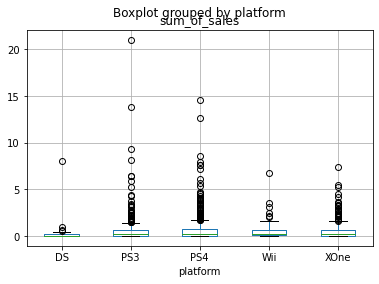

In [232]:
data_cleaned.boxplot('sum_of_sales', by='platform') # распределили продажи по платформам
data_cleaned['sum_of_sales'].describe()

<b>Мы посмотрели, как распределяются данные по платформам. которые мы отобрали. У PS3 и PS4 есть значительные выбросы, как и у платформы DS. А вот у XOne и Wii данные сосредоточены компактно, что говорит о равномерном распределении продаж.</b>

#### Анализ зависимости между суммой продаж игр на платформе и оценкой пользователей

В этом разделе мы проанализируем связь продаж игр с оценками пользователей на самой популярной платформе (PS3) и на остальных платформах.

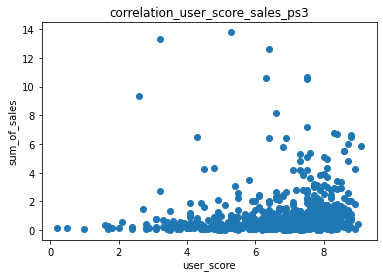

In [233]:
data_ps3 = data.query('platform == "PS3" and sum_of_sales < 15') # сделали срез по платформе PS3 и убрали выбросы
plt.scatter(data_ps3['user_score'], data_ps3['sum_of_sales']) # построили по срезу скаттерплот
plt.title('correlation_user_score_sales_ps3')
plt.xlabel('user_score')
plt.ylabel('sum_of_sales')
plt.show()

In [234]:
print('{0:.2f}'.format(data_ps3['user_score'].corr(data_ps3['sum_of_sales']))) # посчитали коэффициент корреляции

0.12


Мы рассмотрели зависимость между суммой продаж и оценками пользователей для платформы PS3, как у самой популярной платформы. В процессе анализа мы убрали выбросы. Судя по графику и коэффициенту корреляции связь есть, но не очень сильная. Видно, что сумма продаж начинает расти примерно с оценки 5, но и оценку меньше 5 ставит мало пользователей.  

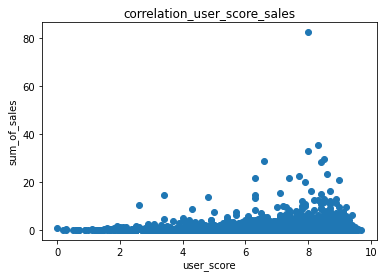

In [235]:
data_other_platforms = data.query('platform != "PS3"') # сделали срез по остальным платформам
plt.scatter(data_other_platforms['user_score'], data_other_platforms['sum_of_sales']) # сделали скаттерплот
plt.title('correlation_user_score_sales')
plt.xlabel('user_score')
plt.ylabel('sum_of_sales')
plt.show()

In [236]:
print('{0:.2f}'.format(data_other_platforms['user_score'].corr(data_other_platforms['sum_of_sales']))) # посчитали коэффициент корреляции

0.09


По другим платформам сумма продаж еще меньше связана с оценками - график ровный, продажи немного начинают расти с оценки 6, но не так сильно, как у PS3. Коэффициент корреляции показывают слабую положительную связь.

<b>На основании анализа связи суммы продаж игр и оценками пользователей можно сделать вывод, что связь между этими двумя факторами, но очень слабая. Это верно как для самой популярной платформы PS3, так и для остальных платформ.</b>

#### Анализ зависимости между суммой продаж игр на платформе и оценкой критиков

В этом разделе мы проанализиурем, насколько оценки критиков влияют на продажи игр на самой популярной платформе PS3 и остальных платформах.

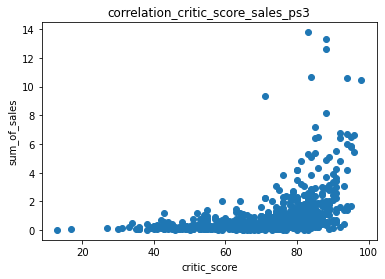

In [237]:
plt.scatter(data_ps3['critic_score'], data_ps3['sum_of_sales']) # построили график связи продаж игр на PS3 и оценкой критиков
plt.title('correlation_critic_score_sales_ps3')
plt.xlabel('critic_score')
plt.ylabel('sum_of_sales')
plt.show()

In [238]:
print('{0:.2f}'.format(data_ps3['critic_score'].corr(data_ps3['sum_of_sales']))) # посчитали коэффициент корреляции

0.45


Мы сравнили продажи игр на платформе PS3 с оценками критиков. Здесь ситуация меняется: продажи игр больше связаны с оценкой критиков, чем с оценкой пользователей. Рост продаж у игр на платформе PS3 начинается с 65 и заметно растет к оценке 80. 

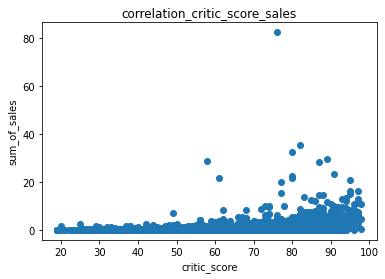

In [239]:
plt.scatter(data_other_platforms['critic_score'], data_other_platforms['sum_of_sales']) 
# построили график связи продаж игр на других платформах и оценкой критиков
plt.title('correlation_critic_score_sales')
plt.xlabel('critic_score')
plt.ylabel('sum_of_sales')
plt.show()

In [240]:
print('{0:.2f}'.format(data_other_platforms['critic_score'].corr(data_other_platforms['sum_of_sales']))) # посчитали коэффициент корреляции

0.23


Продажи игр на других платформах также имеют связь с оценкой критиков сильнее, чем с оценками пользователей.

<b>Можно предположить, что связь продаж игр с оценками критиков более сильная потому, что рецензии критиков обладают значительным весом и тиражируются больше, чем оценки пользователей. К тому же, критики часто имеют возможность оценить игру до ее официального релиза, и их оценки заранее формируют спрос на конкретную игру. </b>

### Зависимость продаж игр от разных факторов

#### Зависимость продаж игр от жанра

В этом разделе мы рассмотрим как продаются игры разных жанров.

In [241]:
data_cleaned['sale_percentage'] = data_cleaned['sum_of_sales'] / data_cleaned['sum_of_sales'].sum() * 100 
# посчитали процент продаж игр по жанрам
data_genre = data_cleaned.groupby('genre').agg({'sum_of_sales':'sum', 'sale_percentage':'sum'}).sort_values(by='sale_percentage', ascending=False)
display(data_genre.sort_values(by='sale_percentage', ascending=False))

,sum_of_sales,sale_percentage
genre,,
Action,261.73,32.305565
Shooter,209.28,25.831616
Sports,129.41,15.973191
Role-Playing,72.30,8.924053
Misc,42.84,5.287779
Racing,33.50,4.134935
Fighting,22.10,2.727823
Platform,15.82,1.952677
Adventure,15.36,1.895898


Судя по данным о продажах по всему миру, самый популярный и прибыльный жанр - это экшн. Помимо него, в топ-5 входят шутер, спорт, РПГ и миксы.

#### Зависимость продаж игр от платформы

In [242]:
data_platform = data_cleaned.groupby('platform')['sum_of_sales'].agg(['sum']).sort_values(by='sum', ascending=False)
display(data_platform) # разделили продажи по платформам

,sum
platform,
PS4,314.14
PS3,288.79
XOne,159.32
Wii,35.37
DS,12.55


Самыми прибыльными платформами в последние несколько лет в мире стали PS4, PS3 и XOne.

#### Зависимость продаж игр от рейтинга

In [243]:
data_rating = data_cleaned.pivot_table(index=['genre','rating'], values=['sum_of_sales', 'sale_percentage'], aggfunc='sum').sort_values(by='sale_percentage', ascending=False)
display(data_rating.head(10)) # построили таблицу с данными по продажам по рейтингу игр

,,sale_percentage,sum_of_sales
genre,rating,,
Action,M,18.559068,150.36
Shooter,M,17.047040,138.11
Sports,E,12.992335,105.26
Role-Playing,M,4.265771,34.56
Action,E10+,3.969537,32.16
Shooter,T,3.491860,28.29
Action,T,3.225249,26.13
Misc,E10+,2.224225,18.02
Racing,E,2.141526,17.35


Больше всего продаж принадлежит играм в жанре экшен и шутер с рейтингом М, затем спорт с рейтингом Е, РПГ с рейтингом М и экшн с рейтингом Е10+. Можно сделать вывод, что основными покупателями игр - это взрослые люди, в пяти самых продаваемых жанров игр три заняты играми с рейтингом М. Также популярен спорт с рейтингом E - то есть для всех. 

### Гипотеза о спортивных событиях

В процессе анализа популярности игр по жанрам, у нас возникла гипотеза, что на популярность игр в жанре спорт влияют проходящие чемпионаты и соревнования. Мы посмотрели на динамику продаж игр этого жанра c 2000 года (относительное свежие данные).

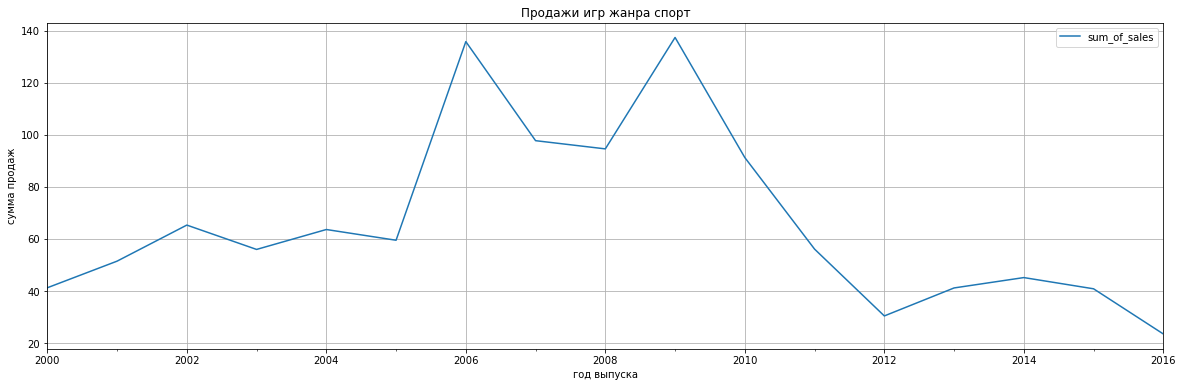

In [244]:
data_sport = data.query('genre == "Sports" and year_of_release >= 2000')
data_sport.pivot_table(index=['year_of_release'], values=['sum_of_sales'], aggfunc='sum') \
        .plot(grid=True, figsize=(20, 6), label='не TBD')
plt.title('Продажи игр жанра спорт')
plt.xlabel('год выпуска')
plt.ylabel('сумма продаж')
plt.show()

<b>Видно, что у продаж игр в жанре спорт было два пика - в 2006 и в 2009 годах. В 2006 года вышла игра FIFA 07, которая стала очень популярной и значительно обошла своих конкурентов - игру Pro Evolution Soccer, а вот с чем связан взлет популярности в 2009 году непонятно. Так что мы не можем ни подтвердить ни опровергнуть нашу гипотезу.</b>

## Анализ пользовательского поведения в разных регионах мира

В этом разделе мы будем анализировать поведение средних пользователей в представленных в данных регионах.

### Пользовательское поведение в Северной Америке

Проанализируем поведение пользователей в Северной Америке.

In [245]:
data_cleaned['na_percentage'] = data_cleaned['na_sales'] / data_cleaned['na_sales'].sum() * 100 
# посчитали отдельно продажи по Северной Америке
data_user_NA = data_cleaned.groupby('genre').agg({'na_sales':'sum', 'na_percentage':'sum'}).sort_values(by='na_percentage', ascending=False)
display(data_user_NA)

,na_sales,na_percentage
genre,,
Action,101.06,30.878758
Shooter,91.83,28.058543
Sports,55.22,16.872403
Role-Playing,26.51,8.100098
Misc,20.25,6.187363
Racing,9.55,2.917991
Fighting,8.95,2.734661
Platform,6.28,1.918846
Adventure,5.48,1.674407


В Северной Америке статистика совпадает с общемировой: самый популярный жанр здесь экшн, вторым идет шутер, а дальше спортивные, РПГ и миксы.

In [246]:
data_platform_NA = data_cleaned.groupby('platform')['na_sales'].agg(['sum']).sort_values(by='sum', ascending=False) 
# посчитали продажи в регионе по платформам
display(data_platform_NA)

,sum
platform,
PS4,108.74
PS3,103.38
XOne,93.12
Wii,17.45
DS,4.59


Самыми популярными платформами в Северной Америке, как и во всем мире, стали PS4, PS3 и XOne.

In [247]:
data_rating_NA = data_cleaned.pivot_table(index=['genre','rating'], values=['na_sales', 'na_percentage'], aggfunc='sum').sort_values(by='na_percentage', ascending=False)
display(data_rating_NA.head(10)) # посчитали продажи по возрастному рейтингу и жанрам

,,na_percentage,na_sales
genre,rating,,
Action,M,18.128208,59.33
Shooter,M,17.993767,58.89
Sports,E,13.214984,43.25
Action,E10+,4.494622,14.71
Role-Playing,M,4.219628,13.81
Shooter,T,4.164630,13.63
Misc,E10+,3.061599,10.02
Action,T,2.847714,9.32
Sports,E10+,2.233561,7.31


В Северной Америке распределение продаж по рейтингам почти не отличается от общемирового, только РПГ и экшн с рейтингом Е10+ поменялись местами.

<b>Исходя из анализа данных, типичный пользователь в Северной Америке выбирает жанры экшн, шутер, РПГ, миксы или спортивные игры, с высоким возрастным ограничением и пользуется платформой PS3 или PS4.</b>

### Пользовательское поведение в Европе

Проанализируем пользовательское поведение в Европе.

In [248]:
data_cleaned['eu_percentage'] = data_cleaned['eu_sales'] / data_cleaned['eu_sales'].sum() * 100
# посчитали продажи отдельно по Европе
data_user_EU = data_cleaned.groupby('genre').agg({'eu_sales':'sum', 'eu_percentage':'sum'}).sort_values(by='eu_percentage', ascending=False)
display(data_user_EU.head(10))

,eu_sales,eu_percentage
genre,,
Action,103.03,32.708975
Shooter,81.52,25.880187
Sports,52.12,16.546557
Role-Playing,22.65,7.190704
Racing,18.30,5.809708
Misc,15.56,4.939839
Platform,6.84,2.171498
Adventure,6.38,2.025461
Fighting,6.09,1.933395


Распределение игр по жанрам в Европе незначительно отличается от общемирового: в топ-5 популярных жанров игр появляются гонки.

In [249]:
data_platform_EU = data_cleaned.groupby('platform')['eu_sales'].agg(['sum']).sort_values(by='sum', ascending=False)
display(data_platform_EU) # посчитали продажи по платформам

,sum
platform,
PS4,141.09
PS3,106.86
XOne,51.59
Wii,11.92
DS,3.53


С распределением продаж по платформам все так же, как и в мире.

In [250]:
data_rating_EU = data_cleaned.pivot_table(index=['genre','rating'], values=['eu_sales', 'eu_percentage'], aggfunc='sum').sort_values(by='eu_percentage', ascending=False)
display(data_rating_EU.head(10)) #посчитали продажи по жанру и рейтингу

eu_percentage  eu_sales
genre        rating                         
Action       M           19.346646     60.94
Shooter      M           17.416426     54.86
Sports       E           14.254421     44.90
Role-Playing M            4.400140     13.86
Action       E10+         4.095368     12.90
Shooter      T            3.193752     10.06
Racing       E            3.028668      9.54
Action       T            2.781041      8.76
             E            2.314359      7.29
Misc         E10+         1.996889      6.29

Распределение продаж по рейтингу не отличается от общемирового. Больше всего продаж так же принадлежит играм в жанре экшен и шутер с рейтингом М, затем спорт с рейтингом Е, РПГ с рейтингом М и экшн с рейтингом Е10+.

<b>Исходя из проведенного анализа, Европе пользователь похож на североамериканского, но миксам он предпочтет гонки.</b>

### Пользовательское поведение в Японии

Проанализируем пользовательское поведение в Японии.

In [251]:
data_cleaned['jp_percentage'] = data_cleaned['jp_sales'] / data_cleaned['jp_sales'].sum() * 100
# посчитали продажи отдельно по Японии
data_user_JP = data_cleaned.groupby('genre').agg({'jp_sales':'sum', 'jp_percentage':'sum'}).sort_values(by='jp_percentage', ascending=False)
display(data_user_JP.head(10))

,jp_sales,jp_percentage
genre,,
Action,20.53,34.974446
Role-Playing,14.99,25.536627
Shooter,6.99,11.908007
Fighting,4.28,7.291312
Sports,4.02,6.848382
Misc,2.31,3.935264
Adventure,1.52,2.589438
Racing,1.04,1.771721
Strategy,0.88,1.499148


Статистика по Японии тоже меняет картину распределения продаж: на первом месте находится экшн, затем РПГ, на третьем шутеры, на четвертом, неожиданно, файтинг, а на пятом спорт. Миксы из топ-5 ушли совсем.

In [252]:
data_platform_JP = data_cleaned.groupby('platform')['jp_sales'].agg(['sum']).sort_values(by='sum', ascending=False)
# посмотрели распределение по платформам
display(data_platform_JP)

,sum
platform,
PS3,35.29
PS4,15.96
DS,3.72
Wii,3.39
XOne,0.34


С платформами в Японии тоже другая история: на первом месте оказался PS3, а не PS4, а на третьем DS, а не XOne, который спустился аж на пятое.

In [253]:
data_rating_JP = data_cleaned.pivot_table(index=['genre','rating'], values=['jp_sales', 'jp_percentage'], aggfunc='sum').sort_values(by='jp_percentage', ascending=False)
display(data_rating_JP.head(10))
# посмотрели на продажи по рейтингам и жанрам

,,jp_percentage,jp_sales
genre,rating,,
Action,M,13.713799,8.05
Shooter,M,8.807496,5.17
Action,T,7.768313,4.56
Role-Playing,T,7.240204,4.25
Fighting,T,4.565588,2.68
Sports,E,4.003407,2.35
Role-Playing,M,3.884157,2.28
Shooter,T,1.345826,0.79
Misc,E,1.294719,0.76


С рейтингом распределение немного отличается от общемирвого: на первом месте экшн и шутер с рейтингом M, а вот на экшн с рейтингом T, дальше РПГ с рейтингом T и файтинг с рейтингом Т. При этом спорта в первой пятерке нет совсем. Интересно, что в первой пятерке совсем нет игр с рейтингом Е или Е10+. Возможно в Японии рейтинг определяется по-другому и его завышают или компьютерные игры популярны среди более взрослой аудитории, чем в среднем по миру.

<b>Японский пользователь чаще, чем североамериканский или европейский играет в РПГ и файтинги, но меньше в миксы, а популярные платформамы не только PS3 и PS4, но и DS и Wii. Также популярнее игры с высоким возрастным рейтингом.</b>

### Выводы по пользовательскому поведению

В этом разделе мы сделаем выводы по анализу пользовательского поведения в разных регионах.

Text(0, 0.5, 'Сумма продаж жанра в процентах')

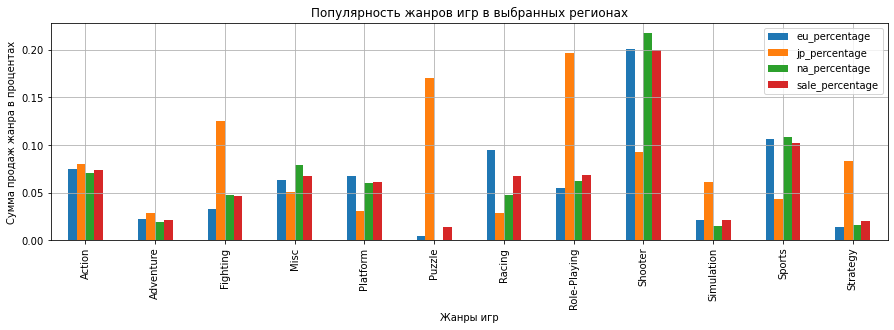

In [254]:
data_cleaned.pivot_table(index=['genre'], values=['sale_percentage','na_percentage','eu_percentage','jp_percentage']).plot.bar(grid=True, figsize=(15, 4))
plt.title('Популярность жанров игр в выбранных регионах')
plt.xlabel('Жанры игр')
plt.ylabel('Сумма продаж жанра в процентах')
# построили график популярности жанров по регионам

На основе представленного графика можно сделать вывод, что игры в жанре шутер самые продаваемые в мире, а в Северной Америке даже выше, чем в среднем по миру. В Японии. в отличии от остальных регионов, популярны игры в жанре файтинг, и не популярны спорт, гонки и шутеры. Тренд в Европе почти полностью совпадает с общемировым - только жанр гонки в Европе популярнее, чем в среднем по миру и среди других регионов.

Text(0, 0.5, 'Сумма продаж игр на платформах в процентах')

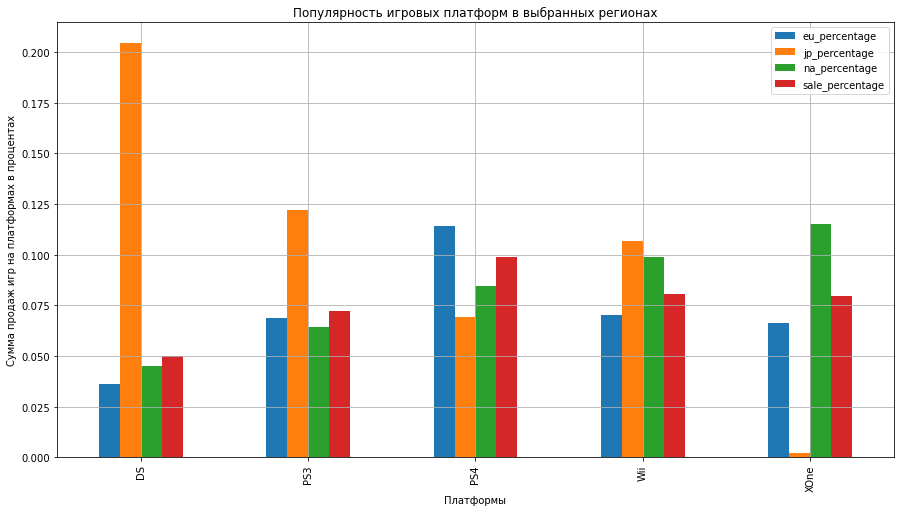

In [255]:
data_cleaned.pivot_table(index=['platform'], values=['sale_percentage','na_percentage','eu_percentage','jp_percentage']).plot.bar(grid=True, figsize=(15, 8))
plt.title('Популярность игровых платформ в выбранных регионах')
plt.xlabel('Платформы')
plt.ylabel('Сумма продаж игр на платформах в процентах')
# построили график популярности по платформам

На основе представленного графика можно увидеть, что самая популярная платформа в среднем по миру - это PS4, и в среднем тренд по миру совпадает с трендом по региону. За исключением Японии - в ней самая популярная платформа DS, а вот XOne там почти не пользуются.

Text(0, 0.5, 'Распространенность игровых рейтингов в процентах')

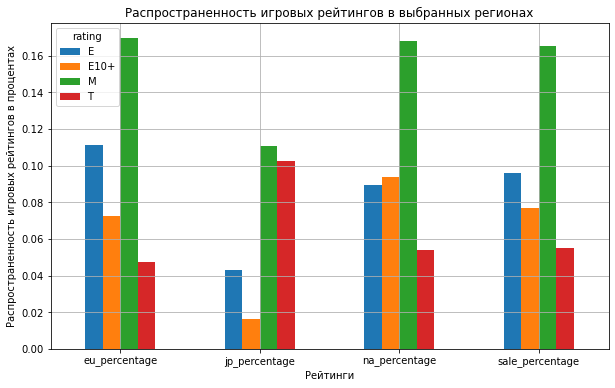

In [256]:
data_cleaned.pivot_table(index=['rating'], values=['sale_percentage','na_percentage','eu_percentage','jp_percentage']).T.plot.bar(grid=True, figsize=(10, 6), rot=0)
plt.title('Распространенность игровых рейтингов в выбранных регионах')
plt.xlabel('Рейтинги')
plt.ylabel('Распространенность игровых рейтингов в процентах')
# построили график популярности по рейтингу

На графике видно, что общемировой тренд по распространенности игр с возрастным рейтингом практически совпадает с рейтингом по регионам. Самый популярный рейтинг везде M, самы непопулярный во всем мире, кроме Японии, T, а в Японии - Е10+.

<b>Из исследования продаж по регионам мы можем составить портрет типичного пользователя.
В Северной Америке это будет человек, играющий в экшны. шутеры, РПГ, миксы или спортивные игры, с высоким возрастным ограничением и пользующийся платформой PS3 или PS4.
В Европе пользователь будет похож на североамериканского, но миксам он предпочтет гонки.
Японский пользователь будет чаще, чем североамериканский или европейский играть в РПГ и файтинги, но меньше в миксы, а популярными платформами будут не только PS3 и PS4, но и DS и Wii. И игры он предпочтет с более выскоим возрастным рейтингом.</b>

## Прогноз на 2016 год

In [257]:
data_year_prognosis['sale_percentage'] = data_year_prognosis['sale_percentage'] / data_year_prognosis['sale_percentage'].sum() * 100
data_year_prognosis.groupby(['genre']).agg({'critic_score':'mean', 'user_score':'mean', 'name':'count','na_sales':'sum', 'eu_sales':'sum', 'jp_sales':'sum', 'other_sales':'sum', 'sum_of_sales':'sum', 'sale_percentage':'sum'}).reset_index().sort_values(by='sum_of_sales', ascending=False) 

,genre,critic_score,user_score,name,na_sales,eu_sales,jp_sales,other_sales,sum_of_sales,sale_percentage
0,Action,71.822785,6.941667,253,24.39,24.14,15.98,7.51,72.02,26.875140
8,Shooter,75.150000,6.070833,34,31.94,24.38,2.73,8.46,67.51,25.192179
10,Sports,65.115385,5.006667,59,18.77,15.81,0.73,5.53,40.84,15.239943
7,Role-Playing,77.275862,7.827273,78,13.93,12.93,6.80,3.98,37.64,14.045824
3,Misc,74.857143,6.372222,39,4.82,3.60,2.15,1.00,11.57,4.317486
1,Adventure,76.900000,7.793333,54,2.89,3.35,1.04,0.88,8.16,3.045003
6,Racing,70.250000,5.863636,18,2.09,4.75,0.28,0.95,8.07,3.011419
2,Fighting,70.300000,6.900000,21,3.70,2.38,0.79,1.03,7.90,2.947981
4,Platform,83.750000,7.440000,13,2.49,1.81,1.31,0.44,6.05,2.257631
9,Simulation,75.333333,6.755556,15,1.20,2.47,1.60,0.39,5.66,2.112098


Судя по анализу выпущенных в 2015 году игр, самый выпускаемый жанр в мире - экшн. По странам ситуация разнится: в Северной Америке и Европе шутеры принесли больше выручки, чем экшн.
При этом самые высокие оценки критиков получают игры в жанрах платформинга, РПГ и квесты, а пользователей в жанрах РПГ, паззл, и эдвенче.

Если мы строим прогноз на 2017 год, то нам стоит сосредоточиться на играх в жанрах шутинг, экшн, квесты, РПГ и спорт по всему миру, но в Америке стоит продавать больше шутинга, в Европе добавить гонки, а в Японии файтинга. 
По поводу платформ, на которых выпускаются игры, то нужно смотреть на те, которые вышли порядка 3 лет назад и позже - больше шанс, что они будут популярны в будущем году.
Рейтинги пользователей и критиков на продажи игр влияют незначительно, к тому же они появляются уже после выхода игры на рынок. Разве что в магазины можно поставлять больше игр с рейтингом критиков от 65.

## Сравнение популярности платформ XOne и PC

В этом разделе мы узнаем, является ли значимым разница в распределении пользовательских оценок на двух популярных платформах - XOne и PC.

In [258]:
data_xone = data.query('platform=="XOne"') # сделали срез по XOne
data_xone = data_xone[data_xone['user_score'].notna()] # избавились от пропусков
data_pc = data.query('platform=="PC"') # сделали срез по PC
data_pc = data_pc[data_pc['user_score'].notna()] # избавились от пропусков

In [259]:
user_variance_xone = np.var(data_xone['user_score']) # считаем стандартное отклонение
print('Стандартное отклонение пользовательского рейтинга на платформе XOne равно', '{0:.2f}'.format(user_variance_xone))
user_variance_pc = np.var(data_pc['user_score'])
print('Стандартное отклонение пользовательского рейтинга на платформе PC равно', '{0:.2f}'.format(user_variance_pc))

Стандартное отклонение пользовательского рейтинга на платформе XOne равно 1.90
Стандартное отклонение пользовательского рейтинга на платформе PC равно 2.34


In [260]:
user_deviation_xone = np.std(data_xone['user_score'], ddof=1) # считаем девиацию
print('Девиация пользовательского рейтинга на платформе XOne равна', '{0:.2f}'.format(user_deviation_xone))
user_deviation_pc = np.std(data_pc['user_score'], ddof=1)
print('Девиация пользовательского рейтинга на платформе PC равна', '{0:.2f}'.format(user_deviation_pc))

Девиация пользовательского рейтинга на платформе XOne равна 1.38
Девиация пользовательского рейтинга на платформе PC равна 1.53


count    182.000000
mean       6.521429
std        1.380941
min        1.600000
25%        5.800000
50%        6.800000
75%        7.500000
max        9.200000
Name: user_score, dtype: float64

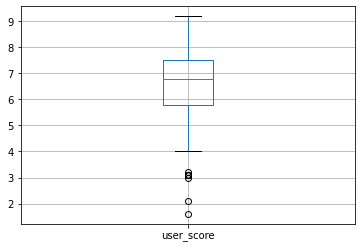

In [261]:
data_xone.boxplot('user_score') # строим боксплот по xone
data_xone['user_score'].describe()

count    770.000000
mean       7.062468
std        1.529963
min        1.400000
25%        6.200000
50%        7.500000
75%        8.200000
max        9.300000
Name: user_score, dtype: float64

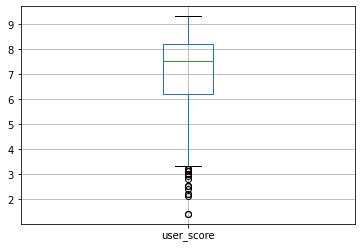

In [262]:
data_pc.boxplot('user_score') # строим боксплот по pc
data_pc['user_score'].describe()

Стандартное отклонение и девиация пользовательского рейтинга для платформы X-One немного меньше, чем для платформы PC. 99% оценок пользователей у платформы X-One, согласно правилу трех сигм, распределены между 5,8 и 7,5, а у платформы PC между 6,2 и 8,2. 
Мы выдвигаем гипотезу, что между пользовательскими рейтингами платформ XBox One и PC нет статистически значимой разницы, потому что их рейтинги выглядят близкими друг другу.

### Проверка гипотезы

In [263]:
score_xone = data_xone['user_score'].values # считаем p-value
score_pc = data_pc['user_score'].values

results = st.ttest_ind(score_xone, score_pc, equal_var = True)

alpha = 0.05
print('p-value: ', results.pvalue)
print()
if results.pvalue < alpha:
    print("Пользовательский рейтинг платформ PC и XOne имеет значимые отличия.")
else:
    print("Пользовательский рейтинг платформ PC и XOne не имеет значимых отличий.")

p-value:  1.3896435533548819e-05

Пользовательский рейтинг платформ PC и XOne имеет значимые отличия.


<b>Наша нулевая гипотеза была, что пользовательский рейтинг платформ XOne и PC не имеет значимых отличий - и она не подтвердилась. На протяжении всех лет присутствия на рынках этих платформ, пользовательские рейтинги платформ XOne и PC имели статистически значимые отличия, и, судя по значениям в боксплоте и общих данных об оценках игр на этих платформах, оценки PC выше, чем у платформы X-One.</b>

## Сравнение популярности жанров экшн и спорт

В этом разделе мы сравним, есть ли значимое различие в пользовательских оценках между жанрами экшн и спорт.

In [264]:
data_action = data.query('genre=="Action"') # делаем срез по экшну 
data_action = data_action[data_action['user_score'].notna()] # убираем пропуски
data_sport = data.query('genre=="Sports"') # делаем срез по спорту
data_sport = data_sport[data_sport['user_score'].notna()] # убираем пропуски

In [265]:
user_variance_action = np.var(data_action['user_score']) # считаем стандартное отклонение
print('Стандартное отклонение пользовательского рейтинга жанра "Экшн"', '{0:.2f}'.format(user_variance_action))
user_variance_sport = np.var(data_sport['user_score'])
print('Стандартное отклонение пользовательского рейтинга жанра ""Спорт', '{0:.2f}'.format(user_variance_sport))

Стандартное отклонение пользовательского рейтинга жанра "Экшн" 2.03
Стандартное отклонение пользовательского рейтинга жанра ""Спорт 2.59


In [266]:
user_deviation_action = np.std(data_action['user_score'], ddof=1) # считаем девиацию
print('Девиация пользовательского рейтинга жанра "Экшн"',  '{0:.2f}'.format(user_deviation_action))
user_deviation_sport = np.std(data_sport['user_score'], ddof=1)
print('Девиация пользовательского рейтинга жанра "Спорт"', '{0:.2f}'.format(user_deviation_sport))

Девиация пользовательского рейтинга жанра "Экшн" 1.43
Девиация пользовательского рейтинга жанра "Спорт" 1.61


<AxesSubplot:title={'center':'user_score'}, xlabel='genre'>

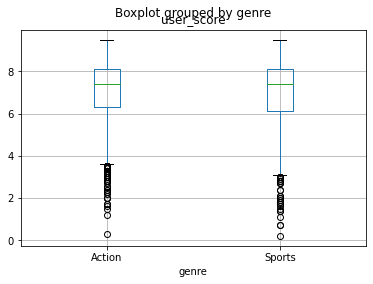

In [267]:
data_genres = data.query('genre==("Action","Sports")') # строим боксплоты
data_genres.boxplot('user_score', by='genre')

In [268]:
data_action['user_score'].describe() # смотрим на данные по оценкам в жанре экшн

count    1830.000000
mean        7.054044
std         1.425394
min         0.300000
25%         6.300000
50%         7.400000
75%         8.100000
max         9.500000
Name: user_score, dtype: float64

In [269]:
data_sport['user_score'].describe() # смотрим на данные по оценкам в жанре спорт

count    1103.000000
mean        6.961197
std         1.611370
min         0.200000
25%         6.100000
50%         7.400000
75%         8.100000
max         9.500000
Name: user_score, dtype: float64

Стандартное отклонение и девиация пользовательского рейтинга для игра в жанре экшн  немного меньше, чем для игра в жанре спорт. 99% оценок пользователей у жанра экшн, согласно правилу трех сигм, распределены между 6,3 и 8,1, а у жанра спорт между 6,1 и 8,1. 
Мы выдвигаем гипотезу, что между пользовательскими рейтингами платформ XBox One и PC нет статистически значимой разницы, потому что пользовательские рейтинги этих двух жанров выглядят близкими друг другу.

### Проверка гипотезы

In [270]:
score_action = data_action['user_score'].values # считаем p-value 
score_sport = data_sport['user_score'].values

results = st.ttest_ind(score_action, score_sport, equal_var = True)

alpha = 0.05
print('p-value: ', '{0:.2f}'.format(results.pvalue))
print()
if results.pvalue < alpha:
    print('Средний пользовательский рейтинг жанров Action и Sport имеет значимые различия')
else:
    print('Средний пользовательский рейтинг жанров Action и Sport не имеет значимых различий')

p-value:  0.10

Средний пользовательский рейтинг жанров Action и Sport не имеет значимых различий


<b>Наша нулевая гипотеза была, что пользовательский рейтинг жанров экшн и спорт не имеет значимых отличий - и она подтвердилась. На основе представленных данных, пользовательские рейтинги жанров экшн и спорт оставались статистически близкими.</b>

# Вывод по итогам исследования

В ходе исследования мы определили годы, на которые нам стоит ориентироваться при составлении прогноза на следующий: в текущем случае это 2012 год и позже. 

Нашли среднюю продолжительность жизни игровых платформ - 5-6 лет, составили портрет типичных пользователей в основных регионах продаж.

В Северной Америке это будет человек, играющий в экшны. шутеры, РПГ, миксы или спортивные игры, с высоким возрастным ограничением и пользующийся платформой PS3 или PS4.

В Европе пользователь будет похож на североамериканского, но миксам он предпочтет гонки.

Японский пользователь будет чаще, чем североамериканский или европейский играть в РПГ и файтинги, но меньше в миксы, а популярными платформами будут не только PS3 и PS4, но и DS и Wii. И игры он предпочтет с более высоким возрастным рейтингом.

Узнали, что на продажу игр оценки критиков влияют сильнее, чем оценки пользоваетелей, но ни то ни другое не является значимым фактором, определяющим покупку.

Мы выяснили, что самыми популярными жанрами являются экшн, шутер, спорт, РПГ и микс, и что пользовательский рейтинг жанров экшен и спорт не имеет значимых различий, а вот платформ PC и X-One имеет.

Если мы строим прогноз на 2017 год, то нам стоит сосредоточиться на играх в жанрах шутинг, экшн, квесты, РПГ и спорт по всему миру, но в Америке стоит продавать больше шутинга, в Европе добавить гонки, а в Японии файтинга. 

По поводу платформ, на которых выпускаются игры, то нужно смотреть на те, которые вышли порядка 3 лет назад и позже - больше шанс, что они будут популярны в будущем году.

Рейтинги пользователей и критиков на продажи игр влияют незначительно, к тому же они появляются уже после выхода игры на рынок. Разве что в магазины можно поставлять больше игр с рейтингом критиков от 65.